# Sentiment Analysis

# Author : Rajya Laxmi Yellajosyula

Below tasks make use of sample tweets dataset as listed below:

- Train.csv
- test.csv
- stopwords.txt

Sentiment Analysis is done by performing below 4 tasks -
1. Read the data
2. Create a word2vec model and use it in SVM classification
3. Use the same data on RNN and LSTM models
4. Compare the results


### 1. Read the training data 

Read the data present in training.csv file. <br>
Perform the following cleaning on the data:
1. Keep only the Sentiment and sentiment text in the dataframe - the first and the last coumn
2. Some of the sentiments and sentiment texts are empty. Remove those rows.
3. Shuffle the rows of the data frame such that the positive and negative tweets are mixed
4. Print the first 5 sentiments.
5. Print the number of positive and negative sentiments


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df = pd.read_csv('HW3-data/train.csv', header=None, encoding='ISO-8859-1')

df = df[df.columns[[0,5]]]
df.columns = ['Sentiment', 'Text']
df = df[df.Sentiment.isnull() == False]
df['Sentiment'] = df['Sentiment'].map(int)
df = df[df['Text'].isnull() == False]
df = df.sample(frac=1)
print(df.head(5))
df.groupby('Sentiment').count()


         Sentiment                                               Text
512354           0  @BexMcLife you killed off my Shaney!  haha.. a...
1344368          1  @Jonasbrothers Love it. Kevin rocks, just sayi...
592256           0        I miss spicy korean food  its been so long!
1505187          1  @LEXYVEE sounds like you need to make a &quot;...
622814           0  Leaving for PA soon! So excited.  Naturally my...


,Text
Sentiment,
0,800000
1,800000


### 2\. Data Preparation 

Before building a neural network model, we first need to prepare the data. The input to a RNN model  is a matrix with shape (a, b), where a is the number of samples (twitters), and b is the sequence length of each tweet.Data preparation is achieved as  follows:

- Take the RAW texts of the top 5000 tweets in the dataframe, and convert them to a list of strings, where each string is a tweet.
- Use `Tokenizer` from `keras.preprocessing.text` to tokenize the texts and convert them to sequences (numbers) with `texts_to_sequences` method of `Tokenizer`. **When tokenizing, only consider the top 10,000 words in the dataset (`num_words`=10,000)**. 
- Pad each sequence with zeros to **make the sequence length 120**.
- Split the above data (the sequence and the label) into training (67%) and validation (33%) sets.

In [2]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

max_len = 120
max_words = 10000

texts = list(df['Text'].head(5000))
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)


labels = df['Sentiment'].head(5000)

data = pad_sequences(sequences, maxlen=max_len)
X_train, X_validation, y_train, y_validation = train_test_split(data, labels, test_size=0.33, random_state=42)

Using TensorFlow backend.


### b) Simple RNN

i) A simple RNN model is built with the following specifications:
1. An embedding layer with output dimenstion 64.
2. A simple RNN layer.
3. A dense layer with sigmoid activation function for prediction.
Print the summary of the model.

In [3]:
from keras.models import Sequential
from keras.layers import Embedding,SimpleRNN, Dense

rnn_model = Sequential()
rnn_model.add(Embedding(max_words, 64, input_length=max_len))
rnn_model.add(SimpleRNN(64))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 64)           640000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 648,321
Trainable params: 648,321
Non-trainable params: 0
_________________________________________________________________


ii) Train the simple RNN model:
- Compile the model with binary cross entory as loss and accuracy as evaluation metrics.
- Fit the model with the training set with 5 epochs and batch size 32.
- Plot the training and validation accuracy for each epoch.

In [4]:
rnn_model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])
rnn_history = rnn_model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_validation, y_validation))

Train on 3350 samples, validate on 1650 samples
Epoch 1/5
3350/3350 [==============================] - 8s - loss: 0.6998 - acc: 0.5173 - val_loss: 0.6856 - val_acc: 0.5606
Epoch 2/5
3350/3350 [==============================] - 8s - loss: 0.5728 - acc: 0.7630 - val_loss: 0.6868 - val_acc: 0.5836
Epoch 3/5
3350/3350 [==============================] - 8s - loss: 0.5365 - acc: 0.8087 - val_loss: 0.9600 - val_acc: 0.4976
Epoch 4/5
3350/3350 [==============================] - 7s - loss: 0.3184 - acc: 0.8621 - val_loss: 0.7989 - val_acc: 0.5976
Epoch 5/5
3350/3350 [==============================] - 8s - loss: 0.1267 - acc: 0.9585 - val_loss: 0.9323 - val_acc: 0.6012


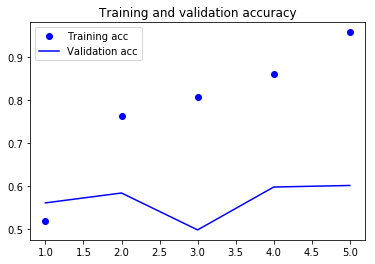

In [5]:
import matplotlib.pyplot as plt

def accuracy_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

accuracy_plot(rnn_history)

### c) LSTM 

i) Building a LSTM model by replacing the simple RNN layer in the above model with a LSTM layer. Print a summary of the LSTM model.

In [6]:
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(Embedding(max_words, 64, input_length=max_len))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 64)           640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


ii) [1 point] Train the LSTM model with the same specifications in the simple RNN model. Again, plot the training and validation accuracy for each epoch.

In [7]:
lstm_model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])

lstm_history = lstm_model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_validation, y_validation))

Train on 3350 samples, validate on 1650 samples
Epoch 1/5
3350/3350 [==============================] - 38s - loss: 0.6612 - acc: 0.6084 - val_loss: 0.6201 - val_acc: 0.6624
Epoch 2/5
3350/3350 [==============================] - 37s - loss: 0.5018 - acc: 0.7722 - val_loss: 0.5652 - val_acc: 0.7133
Epoch 3/5
3350/3350 [==============================] - 37s - loss: 0.3783 - acc: 0.8424 - val_loss: 0.5802 - val_acc: 0.7097
Epoch 4/5
3350/3350 [==============================] - 37s - loss: 0.3138 - acc: 0.8788 - val_loss: 0.6364 - val_acc: 0.7030
Epoch 5/5
3350/3350 [==============================] - 37s - loss: 0.2401 - acc: 0.9099 - val_loss: 0.6866 - val_acc: 0.7012


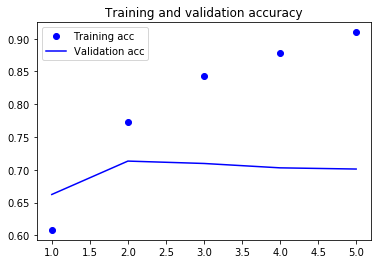

In [8]:
accuracy_plot(lstm_history)

iii) In the previous models, we only use the top 5000 tweets. Now we will be using the whole dataset, split it into training (67%) and validation (33%) set, and train the same LSTM model on the new traning data. we will also plot the training and validation accuracy for each epoch.

In [ ]:
texts = list(df['Text'])
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

labels = df['Sentiment']

data = pad_sequences(sequences, maxlen=max_len)
X_train, X_validation, y_train, y_validation = train_test_split(data, labels, test_size=0.33, random_state=42)

In [ ]:
lstm_model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])

lstm_history = lstm_model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_validation, y_validation))

## Observations and above Results Comparision

# Performance:
LSTM model has better performance, because the added gate architecture addresses the vanishing gradients problem and trains the model more effectively.

# RNN vs SVM Comparision:
- Both RNN and SVM use word embeddings as features
- The word embedding trained in RNN is task specific while the one used in SVM is not.
- RNN takes the word sequences into account, while SVM only uses bag-of-words information.
- But sentiment analysis is a relatively simple task and sequential information might not be very useful.
- RNN automate several data pre-process and is easier to implement and fine tune.

#  LSTM model trained on a 5000 tweets sample vs the one trained on the whole dataset
Larger dataset generally produces better result (higher accuracy), but it is very time consuming to train on it.